# Telecom Customer Churn Prediction

## Background:
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. Given the 15-25 percent annual churn rate in the competitive telecom market, the core objective is to predict which customers are "high-risk" to focus cost-effective retention efforts. Reducing attrition is critical for growth and profitability, as retaining existing customers is much cheaper than acquiring new ones.
## Objective:
The primary goal is to develop a predictive model to identify high-risk customers and extract actionable insights for implementing effective, targeted retention strategies, which will require extensive analysis to discover the fundamental churn drivers.

## Key Questions:
1. What's the % of Churn Customers and customers that keep in with the active services?
2. Is there any patterns in Churn Customers based on the gender?
3. Is there any patterns/preference in Churn Customers based on the type of service provided?
4. Many more questions that will arise during the analysis.

## Data Description:

* customerID: Unique identifier for each customer.
* gender: Customer's gender (Male, Female).
* SeniorCitizen: Whether the customer is a senior citizen (1: Yes, 0: No).
* Partner: Whether the customer has a partner (Yes, No).
* Dependents: Whether the customer has dependents (Yes, No).
* tenure: Number of months the customer has stayed with the company.
* PhoneService: Whether the customer has phone service (Yes, No).
* MultipleLines: Whether the customer has multiple lines (Yes, No, No phone service).
* InternetService: Customer's internet service provider (DSL, Fiber optic, No).
* OnlineSecurity: Whether the customer has online security (Yes, No, No internet service).
* OnlineBackup: Whether the customer has online backup (Yes, No, No internet service).
* DeviceProtection: Whether the customer has device protection (Yes, No, No internet service).
* TechSupport: Whether the customer has tech support (Yes, No, No internet service).
* StreamingTV: Whether the customer has streaming TV (Yes, No, No internet service).
* StreamingMovies: Whether the customer has streaming movies (Yes, No, No internet service).
* Contract: The customer's contract term (Month-to-month, One year, Two year).
* PaperlessBilling: Whether the customer uses paperless billing (Yes, No).
* PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer, Credit card).
* MonthlyCharges: The amount charged to the customer monthly.
* TotalCharges: The total amount charged to the customer over the tenure.
* Churn: Whether the customer churned (Yes) or remained active (No).

In [1]:
from google.colab import files

uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint





###Load the dataset and View the first few rows of the dataset

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **DATA WRANGLING**

### Check the shape of the dataset

In [4]:
df.shape

(7043, 21)

* The dataset has 7041 rows and 21 columns.

### Check the info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observations**

No Missing Values: All columns have 7,043 non-null counts.

Incorrect Data Type: TotalCharges is an object (string) and must be converted to a numerical type (float64).

Multiple object columns (like gender, Partner, Churn, etc.) should be converted to the category type for memory efficiency and better analysis.

# Data Preprocessing

In [6]:
def uniquevalues(col):
  return list(df[col].unique())

for col in df.select_dtypes('object').columns:
  print(f"{col}: {uniquevalues(col)}\n")

customerID: ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4190-MFLUW', '4183-MYFRB', '8779-QRDMV', '1680-VDCWW', '1066-JKSGK', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '6467-CHFZW', '8665-UTDHZ', '5248-YGIJN', '8773-HHUOZ', '3841-NFECX', '4929-XIHVW', '6827-IEAUQ', '7310-EGVHZ', '3413-BMNZE', '6234-RAAPL', '6047-YHPVI', '6572-ADKRS', '5380-WJKOV', '8168-UQWWF', '8865-TNMNX', '9489-DEDVP', '9867-JCZSP', '4671-VJLCL', '4080-IIARD', '3714-NTNFO', '5948-UJZLF', '7760-OYPDY', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '9420-LOJKX', '6575-SUVOI', '7495-OOKFY', '4667-QONEA', '1658-BYGOY', '8769-KKTPH', '5067-XJQFU', '3957-SQXML', '5954-BDFSG', '0434-CSFON', '1215-FIGMP', '0526-SXDJP', '0557-ASKVU', '5698-BQJOH', '5122-CYFXA', '8627-ZYGSZ', '3410-YOQBQ', '3170-NMYVV', '7410-OIEDU', '2273-Q

In [7]:
df = df.drop('customerID', axis=1)


In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [10]:
df['SeniorCitizen'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [11]:
df['SeniorCitizen'].value_counts()


,count
SeniorCitizen,
No,5901
Yes,1142


### Fixing the datatypes

In [12]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

* There are 18 categorical columns and numeric 2 columns with a massive improvement in memory usage.

In [13]:
df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [14]:
df.duplicated().sum()

np.int64(22)

In [15]:
df.shape

(7043, 20)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(7021, 20)

In [18]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [19]:
df.describe()

,tenure,MonthlyCharges
count,7021.000000,7021.000000
mean,32.469449,64.851894
std,24.534965,30.069001
min,0.000000,18.250000
25%,9.000000,35.750000
50%,29.000000,70.400000
75%,55.000000,89.900000
max,72.000000,118.750000


In [20]:
df.describe(include='category').T

,count,unique,top,freq
gender,7021,2,Male,3541
SeniorCitizen,7021,2,No,5880
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087


In [21]:
cat_col = ['gender','SeniorCitizen',
    'Partner',
    'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(f"Value counts for '{column}':\n")
    print(df[column].value_counts())
    print('-'*50)
# ------------------------------



Value counts for 'gender':

gender
Male      3541
Female    3480
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'SeniorCitizen':

SeniorCitizen
No     5880
Yes    1141
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Partner':

Partner
No     3619
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Dependents':

Dependents
No     4911
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'PhoneService':

PhoneService
Yes    6339
No      682
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'MultipleLines':

MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'InternetService':

InternetService
Fiber optic    3090
DSL 

In [22]:
df['TotalCharges'].value_counts(dropna=False)

,count
TotalCharges,
,11
19.75,9
20.2,8
19.65,7
19.9,7
...,...
1006.9,1
1007.8,1
1007.9,1


In [23]:
# Strip whitespace, then check for empty strings
whitespace_only_count = (df['TotalCharges'].str.strip() == '').sum()
print(f"Count of strings that are only whitespace: {whitespace_only_count}")

Count of strings that are only whitespace: 11


In [24]:
#.str.strip() to convert whitespace-only strings to empty strings
df['TotalCharges'] = df['TotalCharges'].str.strip()

#Replace the resulting empty strings with the standard NaN marker
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)

In [25]:
# Convert the column to a numerical type (float)
# errors='coerce' ensures that if any other non-numeric text slipped through,
# it will also be converted to NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['TotalCharges'].describe()

,TotalCharges
count,7010.000000
mean,2290.353388
std,2266.820832
min,18.800000
25%,408.312500
50%,1403.875000
75%,3807.837500
max,8684.800000


In [26]:
df['TotalCharges'].value_counts(dropna=False)

,count
TotalCharges,
NaN,11
19.75,9
20.20,8
19.90,7
19.65,7
...,...
130.15,1
3211.90,1
7843.55,1


In [27]:
median_value = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_value, inplace=True)

/tmp/ipython-input-360776509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_value, inplace=True)


In [28]:
df['TotalCharges'].value_counts(dropna=False)

,count
TotalCharges,
1403.875,11
19.750,9
20.200,8
19.900,7
19.650,7
...,...
130.150,1
3211.900,1
7843.550,1


# EDA

/tmp/ipython-input-3844454631.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-3844454631.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-3844454631.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-3844454631.py:22: Future

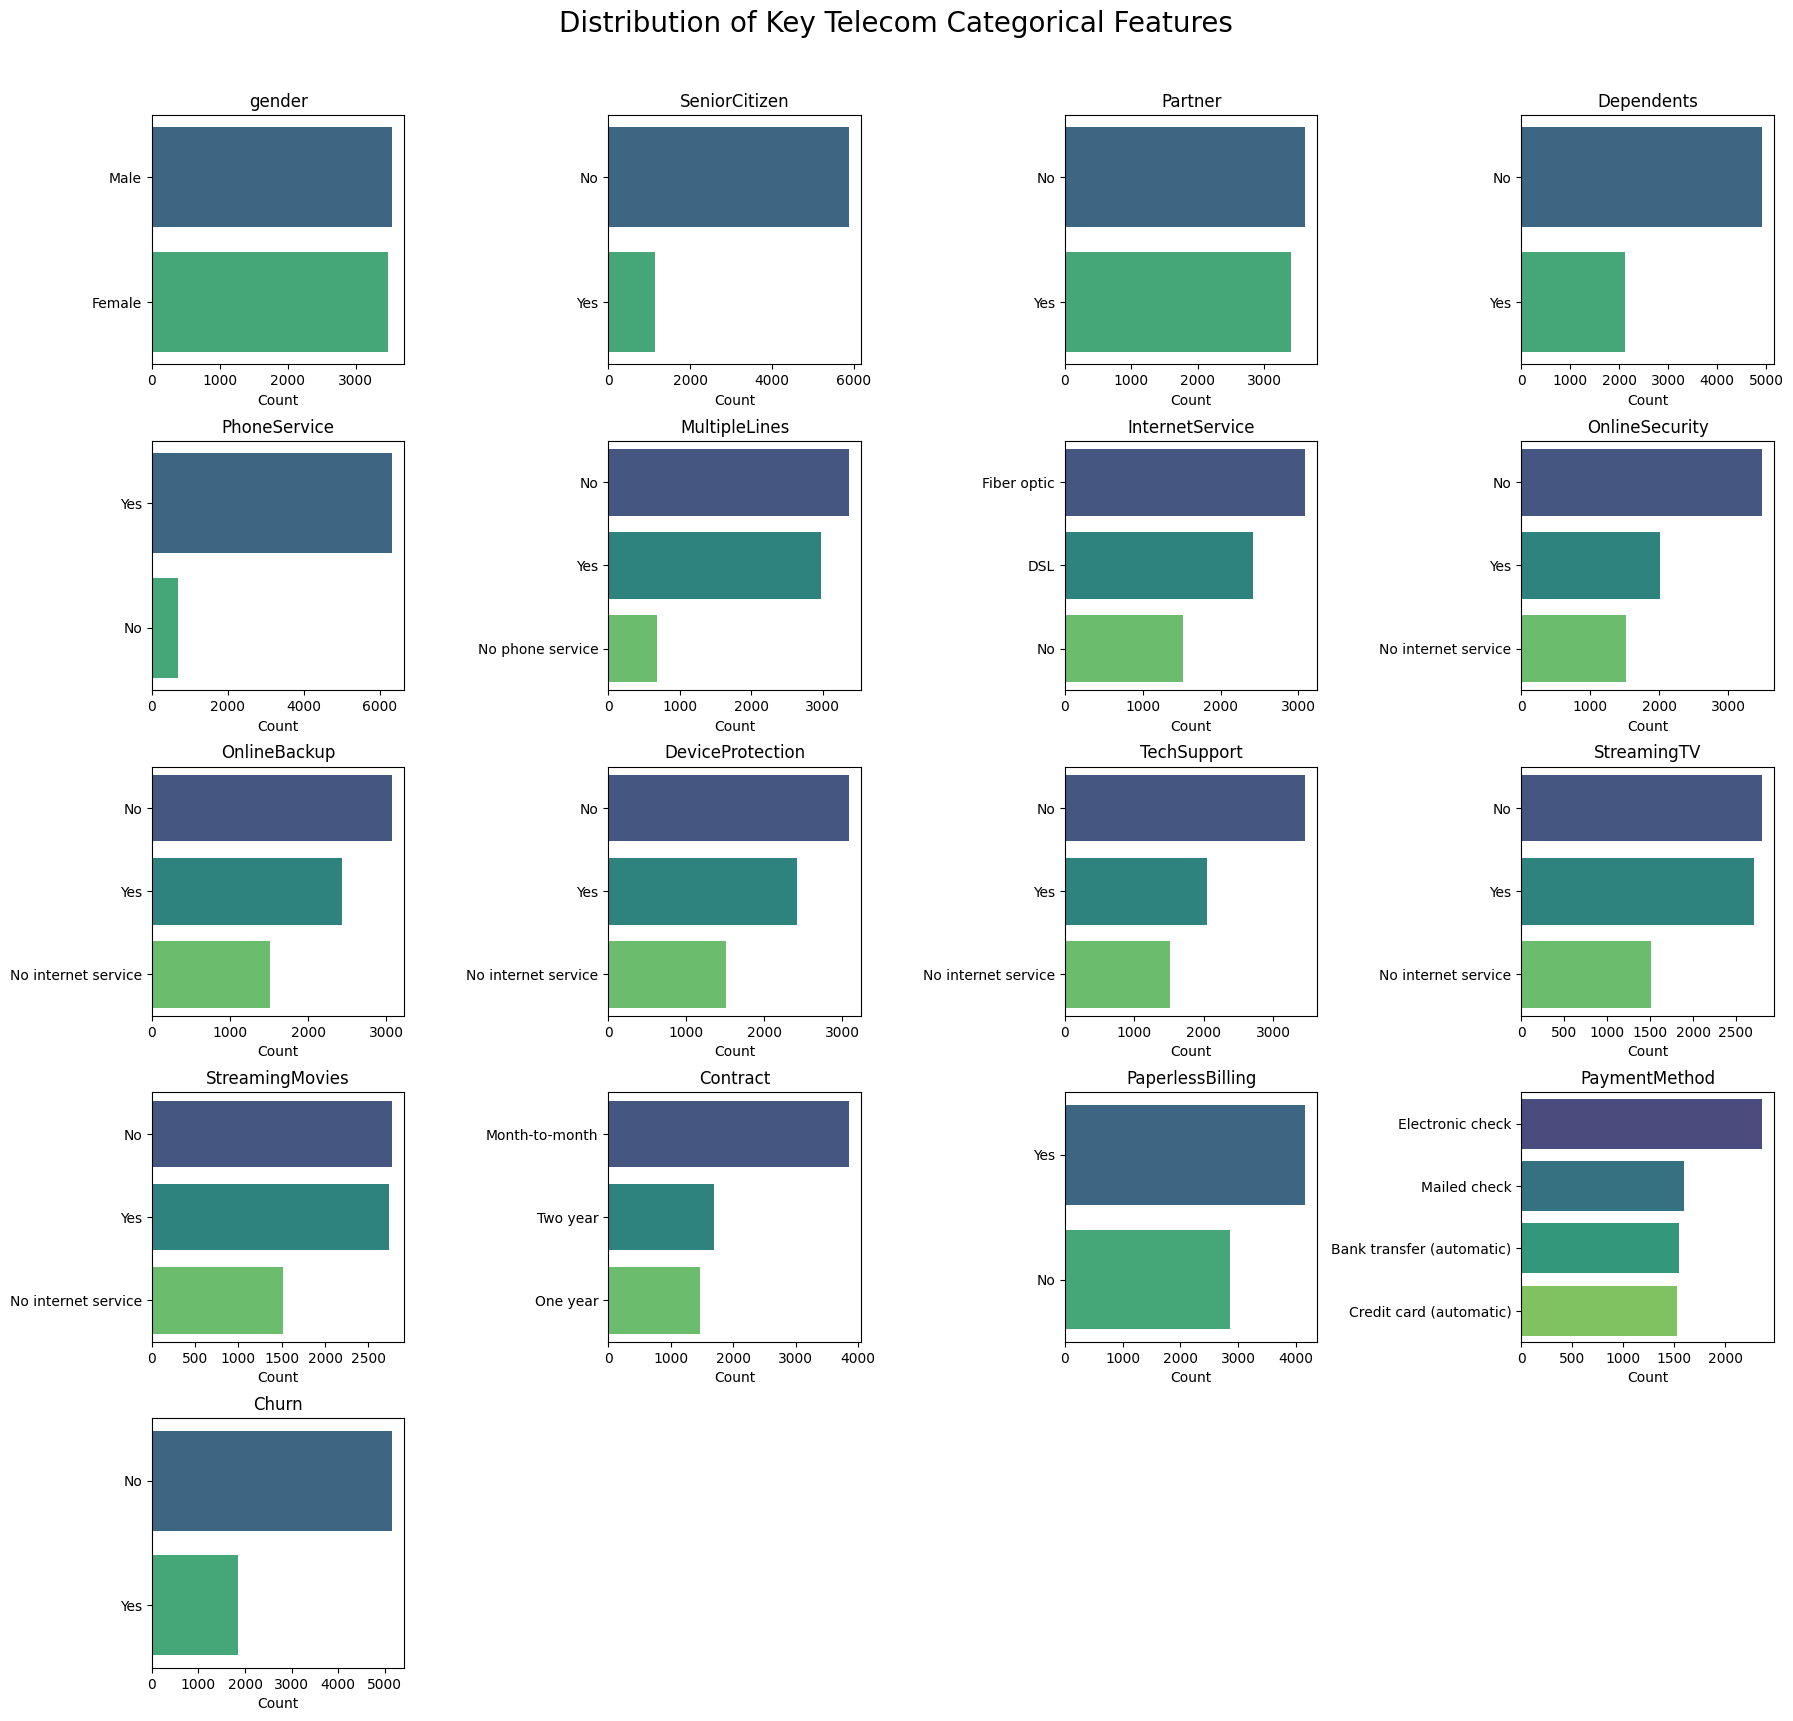

In [29]:
import math

cat_col = ['gender','SeniorCitizen',
    'Partner',
    'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod','Churn']

num_cols = len(cat_col)
n_cols = 4
n_rows = math.ceil(num_cols / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 3.5 * n_rows))

axes = axes.flatten()

fig.suptitle('Distribution of Key Telecom Categorical Features', fontsize=20)

for i, col in enumerate(cat_col):
    if col in df.columns:
        # Using y=col creates horizontal bars
        sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', order=df[col].value_counts().index)

        # Customize the subplot
        axes[i].set_title(f'{col}', fontsize=12)
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(None)
    else:
        axes[i].set_title(f'⚠️ {col} not found', fontsize=12)
        axes[i].axis('off')

for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout(pad=1.0)
fig.subplots_adjust(top=0.92)

plt.show()

Gender: Nearly balanced between Male (3541, 50%) and Female (3480, 50%).

SeniorCitizen: Mostly non-seniors (No, 5880, 83%), fewer seniors (Yes, 1141, 17%).

Partner: Roughly equal split between those with (Yes, 3402, 49%) and without partners (No, 3619, 51%).

Dependents: Majority without dependents (No, 4911, 70%), fewer with dependents (Yes, 2110, 30%).

PhoneService: Most have phone service (Yes, 6339, 90%), a small portion do not (No, 682, 10%).

MultipleLines: Among phone users, slightly more have a single line (No, 3368, 48%) than multiple lines (Yes, 2971, 42%), with 10% having no phone service.

InternetService: Fiber optic is most common (3090, 45%), followed by DSL (2419, 36%), while 22% have no internet service (1512).

OnlineSecurity: Among internet users, many lack online security (No, 3490, 57%), fewer have it (Yes, 2019, 33%), with 22% having no internet service.

OnlineBackup: Slightly more opt out of online backup (No, 3080, 50%) than use it (Yes, 2429, 40%), 22% have no internet.

DeviceProtection: Similar pattern to online backup; most do not use it (No, 3087, 50%), fewer use it (Yes, 2422, 40%).

TechSupport: Most internet users do not use tech support (No, 3465, 57%), while 33% use it.

StreamingTV: Usage is nearly balanced among internet users (Yes, 2707, 44%; No, 2802, 46%), 22% have no internet.

StreamingMovies: Mirrors streaming TV usage; nearly equal Yes (2732, 44%) and No (2777, 46%), 22% have no internet.

Contract: Most are on month-to-month contracts (3853, 53%), fewer on two-year (1695, 23%) or one-year contracts (1473, 20%).

PaperlessBilling: Majority use paperless billing (Yes, 4161, 59%), while 41% do not.

PaymentMethod: Electronic check is most popular (2359, 33%), followed by mailed check (1596, 23%), bank transfer (1544, 22%), and credit card (1522, 22%).

TotalCharges: Wide range from 19.65 to 7843.55, showing diverse customer spending.

Churn: Most customers stay (No, 5164, 74%), with 26% leaving (Yes, 1857)

In [30]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

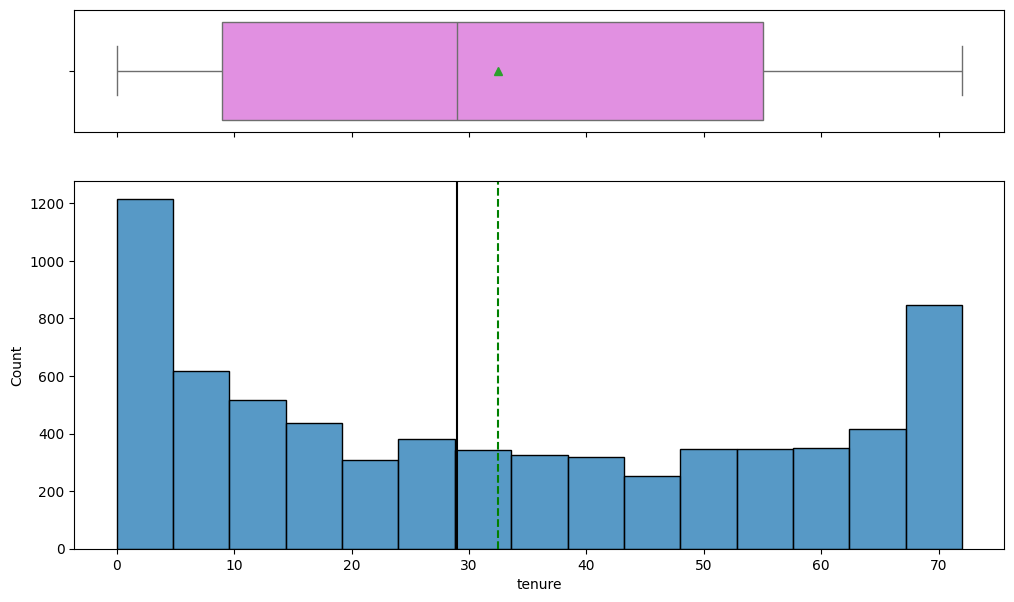

In [31]:
histogram_boxplot(df, 'tenure')

**Observations:**


*   The customer tenure distribution is bimodal (U-shaped), defined by two dominant peaks:
*   A large peak at 1 month tenure, signaling a high concentration of new customers who are likely to churn quickly.
*   A large peak at 72 months tenure, indicating a highly successful long-term retention for the most loyal customers.
*   The distribution suggests two distinct customer segments (short-term vs. long-term loyalists), necessitating tailored engagement and retention strategies. The mean tenure (32.47 months) being slightly higher than the median (29 months) indicates a mild positive skew, but the bimodal characteristic is the most insightful feature.



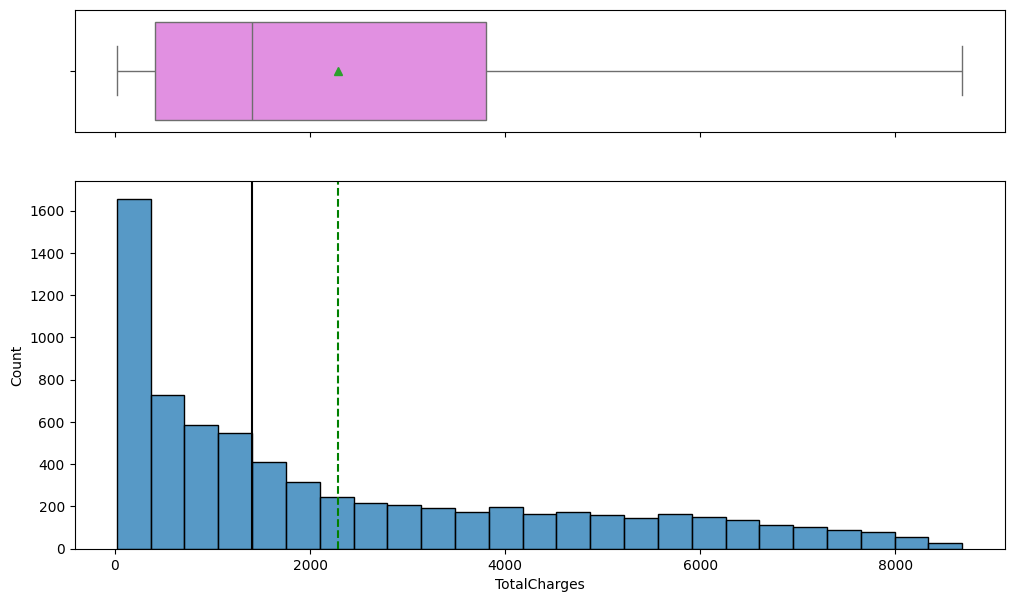

In [32]:
histogram_boxplot(df, 'TotalCharges')

**Observations:**

*   Heavily right-skewed distribution: Most customers have low total charges, with fewer customers having very high total charges.
*   Mean > Median: The mean ($\$2290.35$) is significantly higher than the median ($\$1403.88$), indicating the influence of high-spending customers and confirming positive skew.

**Insights:**

*   Two Customer Segments: There is a large group of lower-spending (potentially newer or basic plan) customers, and a smaller, high-value segment of high-spending (likely long-term or premium service) customers.

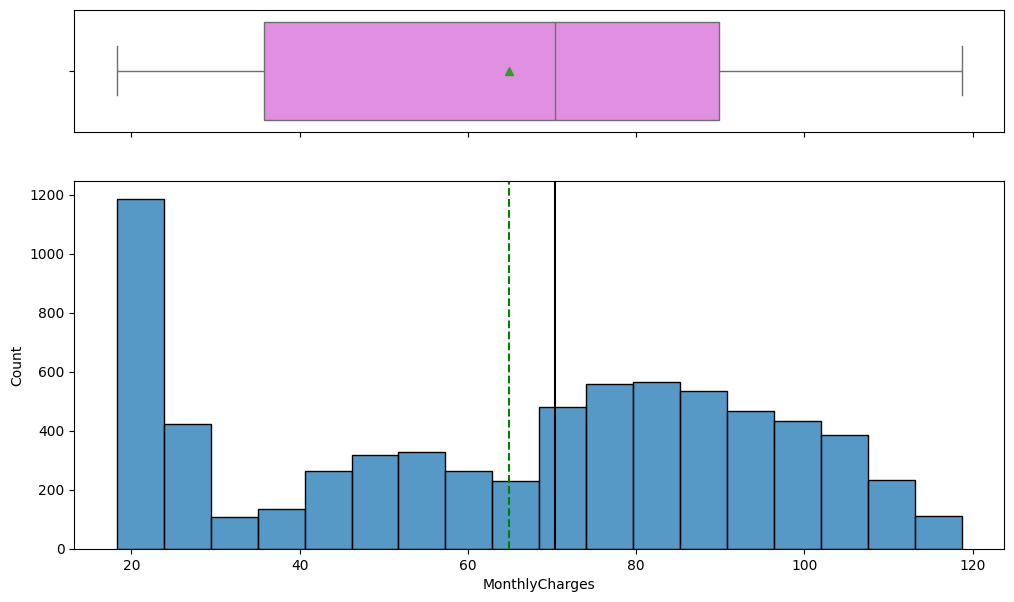

In [33]:
histogram_boxplot(df, 'MonthlyCharges')

**Observations:**


*   Prominent peak at low charges ($\$20$): A large customer segment pays minimal monthly fees, likely representing basic or phone-only service subscribers.
*   Broader, less distinct peaks in mid- ($\sim\$70-$80) and high- ($\sim\$100-110$) ranges: Indicates the popularity of other distinct service tiers (e.g., mid-tier internet bundles and premium/full-service bundles).

**Insights:**


*   Clear Customer Segmentation by Pricing Tiers: The multiple peaks reveal natural customer segmentation based on price sensitivity and service needs (low-cost, mid-tier, premium).
*   Opportunity for Targeted Strategies: Each distinct segment requires tailored marketing, feature bundling, and retention efforts (e.g., promoting upgrades to the low-cost segment, or offering premium retention deals to the high-cost segment).


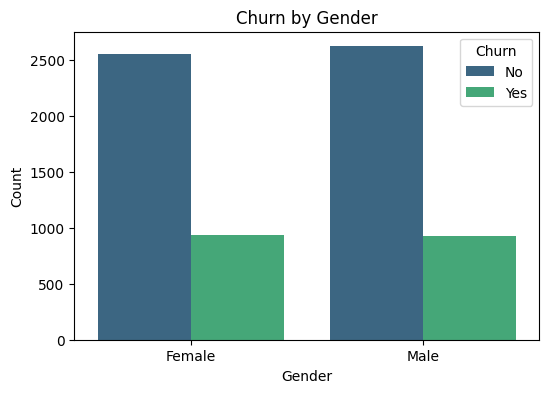

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='viridis')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

*   Gender: Churn is nearly identical between males and females, suggesting gender has little impact and other features likely drive customer churn.


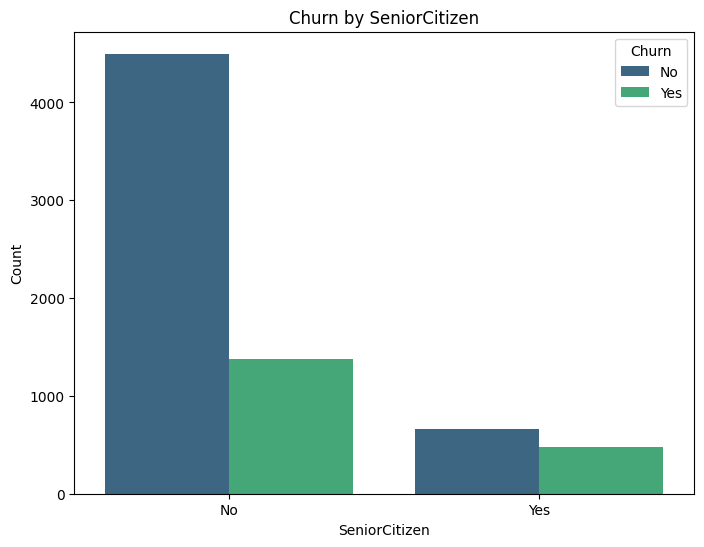

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='viridis')
plt.title('Churn by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()

**SeniorCitizen vs. Churn:**
- There's a noticeable difference in churn rates between senior and non-senior citizens. A higher proportion of senior citizens churn compared to non-senior citizens.

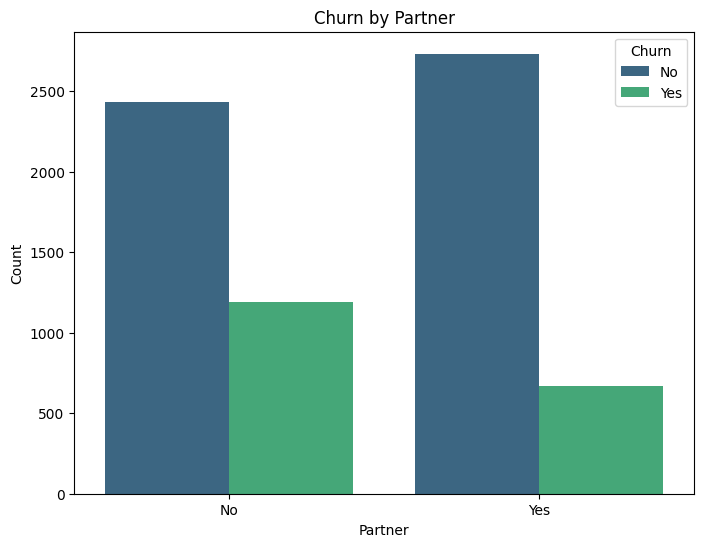

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Partner', hue='Churn', palette='viridis')
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

**Partner vs. Churn:**
- Customers with partners appear to have a lower churn rate compared to those without partners.

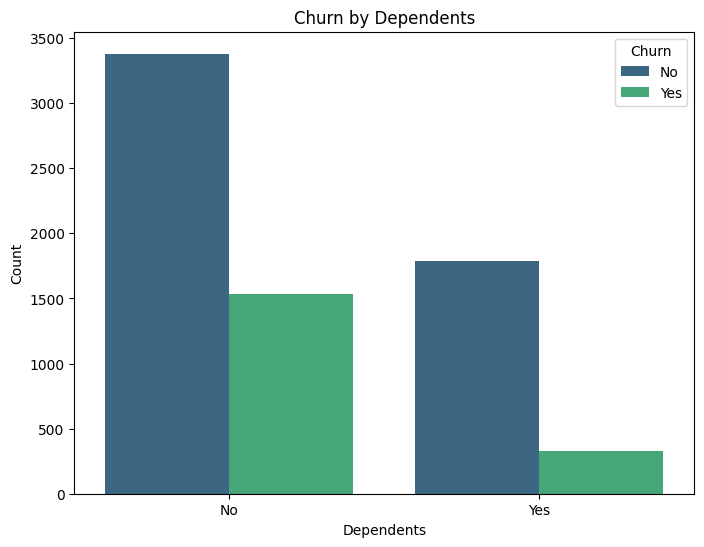

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='viridis')
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

**Dependents vs. Churn:**
- Customers without dependents show a significantly higher churn rate than customers with dependents.

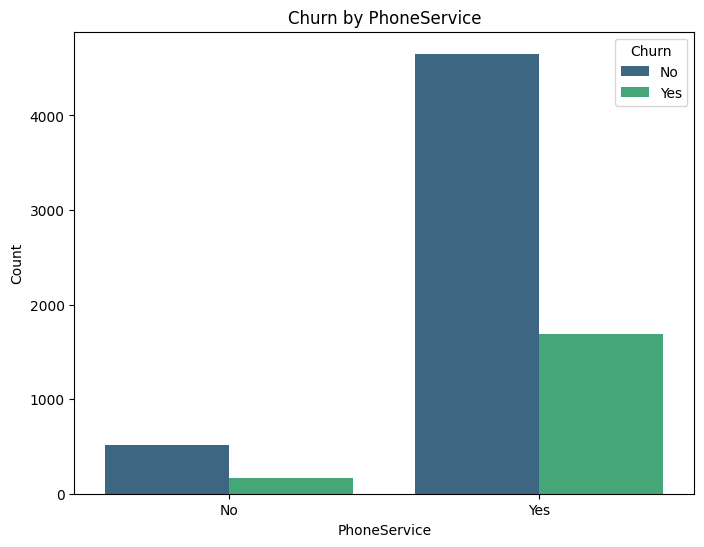

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='viridis')
plt.title('Churn by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.show()

**PhoneService vs. Churn:**
- The churn rate for customers with phone service is higher than for those without phone service, however, the absolute number of customers with phone service is much larger.

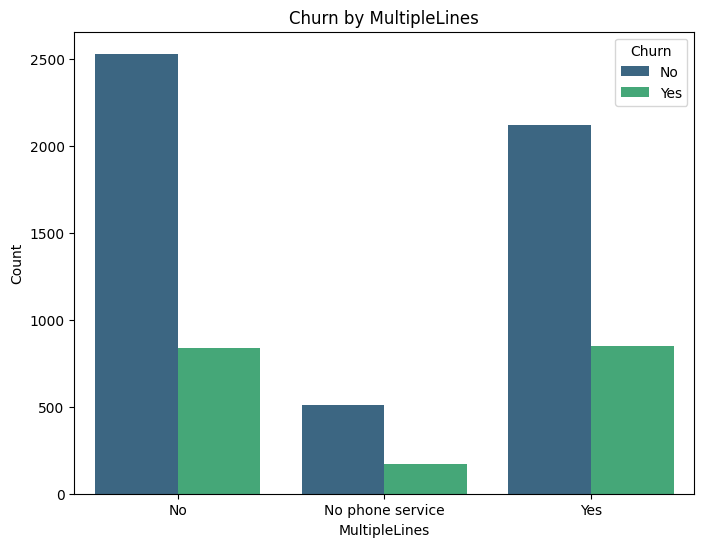

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='viridis')
plt.title('Churn by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.show()

**MultipleLines vs. Churn:**
- Customers with multiple lines have a slightly higher churn rate than those with no multiple lines. Interestingly, customers with 'No phone service' (who cannot have multiple lines) have a very low churn rate, consistent with the `PhoneService` plot.


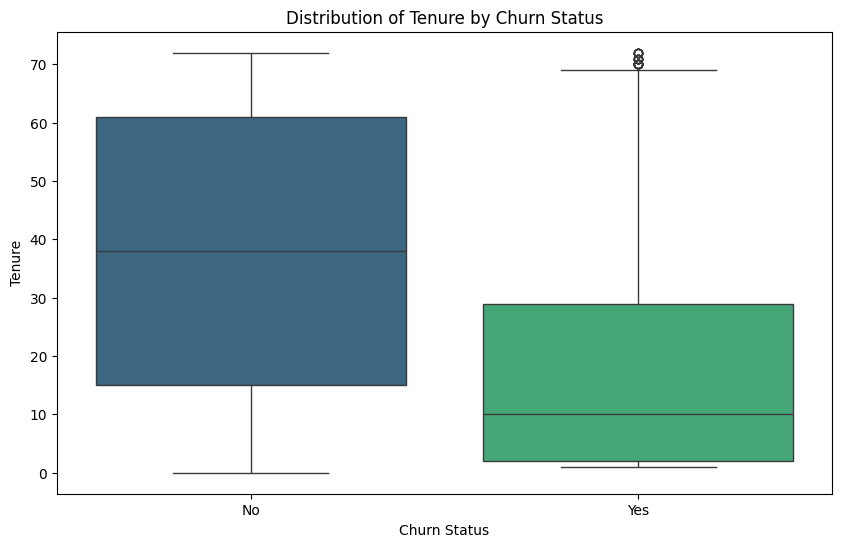

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure', hue='Churn', palette='viridis', dodge=False)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.show()

**Tenure vs. Churn:**


*   Churned Customers ('Yes') have a significantly lower median tenure (around 10 months).
*   Churned Customers ('Yes') have a significantly lower median tenure (around 10 months).

**Insights**


*   Early-Stage Risk: Customers with short tenures (new customers) are at a much higher risk of churning.
*   Critical Intervention Area: This difference highlights early-stage customer retention as the most critical area for immediate strategic intervention.
*   Loyalty Gradient: The longer a customer stays, the less likely they are to leave, reinforcing the importance of retaining customers past the initial few months.

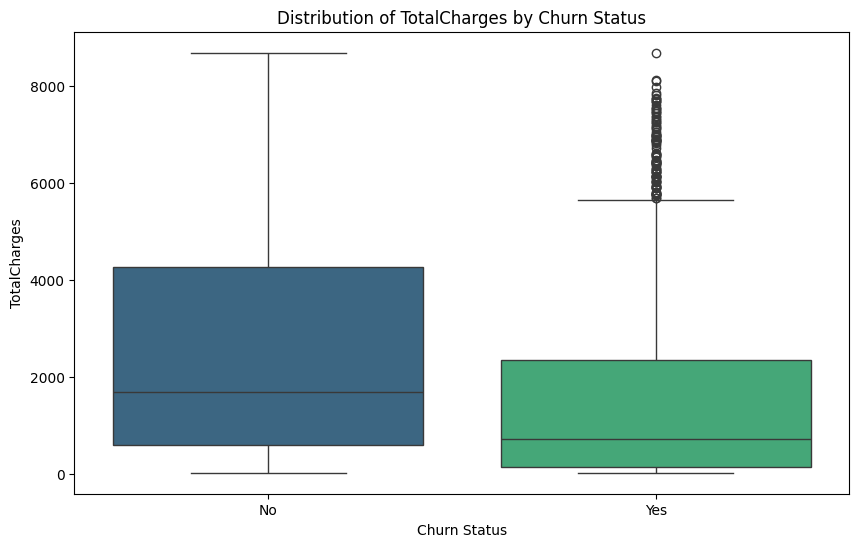

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges', hue='Churn', palette='viridis', dodge=False)
plt.title('Distribution of TotalCharges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('TotalCharges')
plt.show()

**TotalCharges vs. Churn:**

Customers who churn ('Yes') have significantly lower total charges than customers who do not churn ('No').
This is consistent with the tenure observation: lower tenure customers would naturally have accumulated lower total charges. While churned customers might have higher monthly charges, their short tenure results in lower overall spending.
The distribution for non-churned customers shows a much wider spread, with many long-term customers having very high total charges.

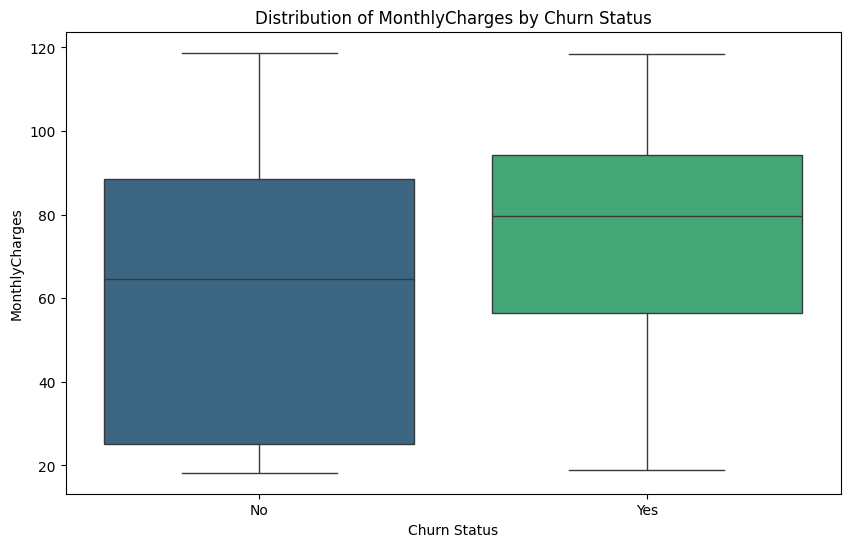

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='viridis', dodge=False)
plt.title('Distribution of MonthlyCharges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('MonthlyCharges')
plt.show()

**MonthlyCharges vs. Churn (Insight)**

Customers who churn (Churn = Yes) tend to have higher monthly charges compared to customers who stay (Churn = No).

The median monthly charge for churned customers is in the 75–80 range.

For non-churned customers, the median is noticeably lower, around 60.

This indicates that customers with higher monthly bills may be more price-sensitive or feel they are not receiving enough value for the cost, making them more likely to churn.

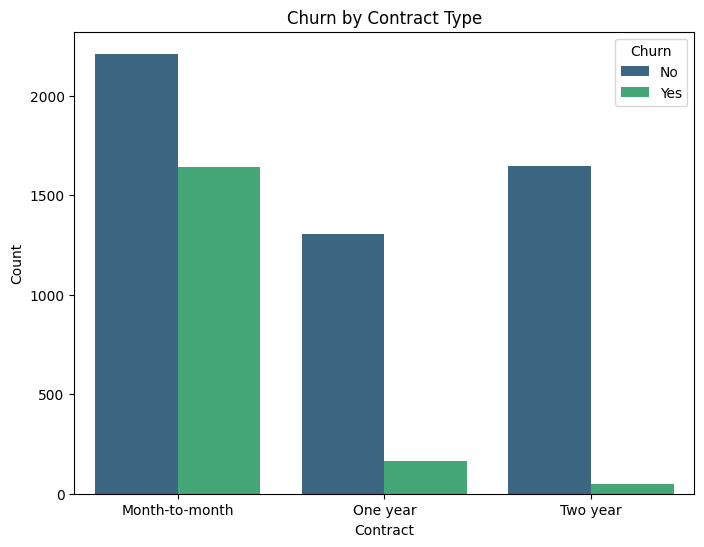

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

### Observations from Contract Type vs. Churn Plot:

**Contract vs. Churn:**
- The countplot visually confirms that customers on 'Month-to-month' contracts have a significantly higher number of churned customers compared to those on 'One year' or 'Two year' contracts. This reinforces the earlier observation that longer-term contracts are effective in retaining customers, as customers on these contracts show a much lower propensity to churn.

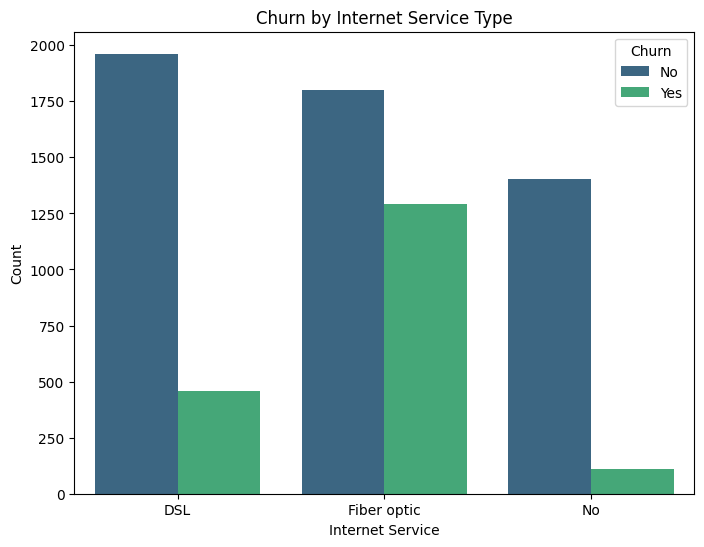

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

### Observations from Internet Service vs. Churn Plot:

**InternetService vs. Churn:**
- The plot clearly shows that customers with 'Fiber optic' internet service have a disproportionately higher number of churned customers compared to 'DSL' or those with 'No internet service'. This reinforces the idea that Fiber optic, while potentially a premium service, is associated with higher churn.
- Conversely, customers with 'No internet service' show a very low churn rate, suggesting that these customers are quite stable and loyal, likely due to a simpler service bundle.

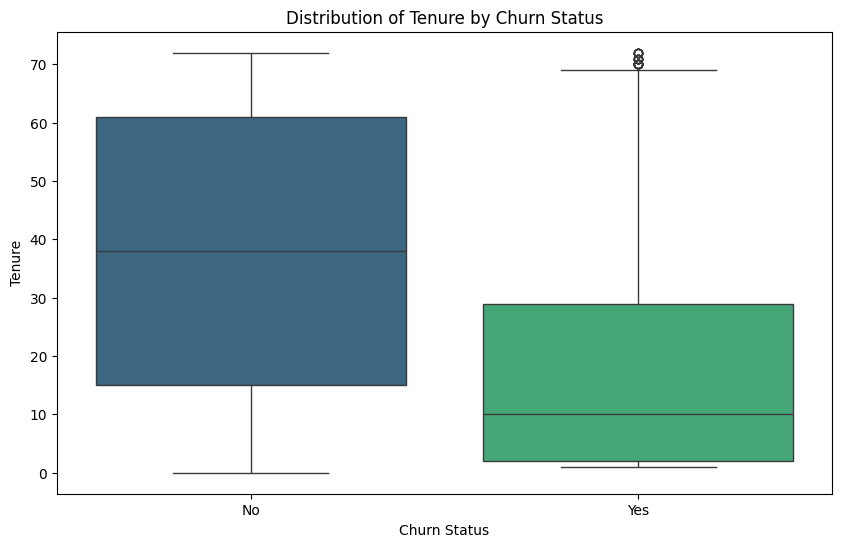

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure', hue='Churn', palette='viridis', dodge=False)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure')
plt.show()

### Observations from Tenure vs. Churn Plot:

**Tenure vs. Churn:**
- The boxplot visually confirms that customers who churn ('Yes') have a significantly lower median tenure and a much tighter distribution towards lower tenure values compared to customers who do not churn ('No'). This clearly indicates that shorter tenure is a strong predictor of churn risk.
- Non-churned customers ('No') show a much wider range of tenure, with a higher median, suggesting that customer loyalty increases significantly with longer engagement.

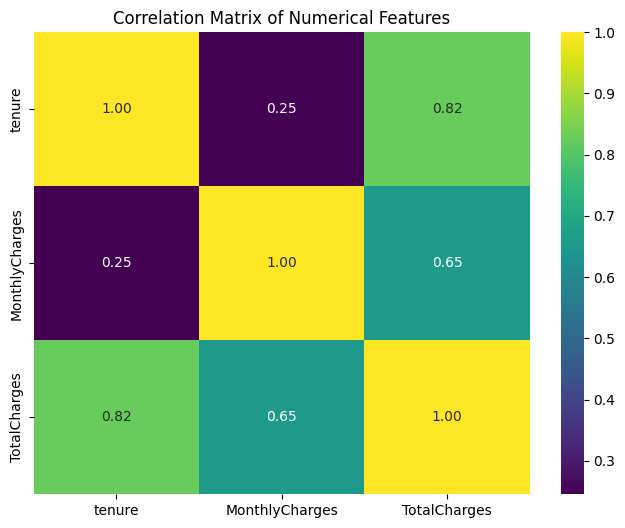

In [46]:
# Select numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observations from the Correlation Heatmap:

Correlation Insight: TotalCharges is strongly driven by tenure (0.82) and moderately influenced by MonthlyCharges (0.65), while tenure has only a weak link with MonthlyCharges (0.25), indicating that TotalCharges largely reflects how long a customer has stayed

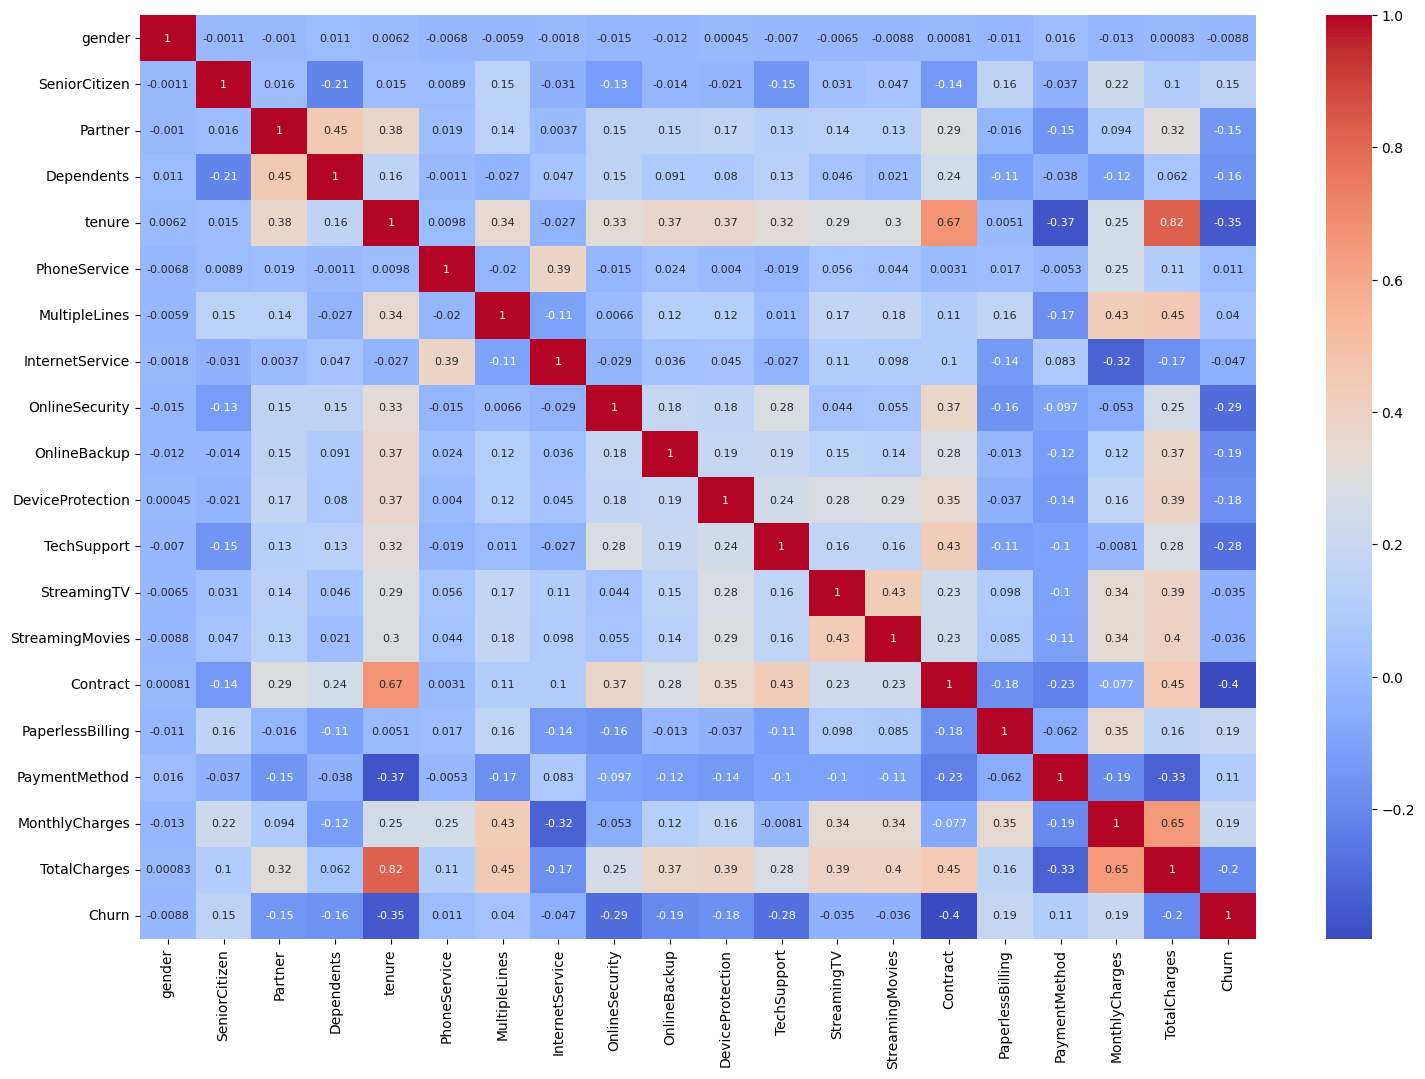

In [47]:
from sklearn.preprocessing import LabelEncoder
df_temp = df.copy()
le = LabelEncoder()
for col in df_temp.select_dtypes(include=['object', 'category']).columns:
    df_temp[col] = le.fit_transform(df_temp[col].astype(str))
plt.figure(figsize=(18,12))
sns.heatmap(df_temp.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.show()

# Heatmap Insights on Churn

The correlation heatmap highlights the most influential factors driving customer churn. Tenure (-0.35) and longer contracts (-0.39) are strongly negatively correlated with churn, indicating that long-term customers and those on one-year or two-year plans are far less likely to leave. Similarly, usage of OnlineSecurity, TechSupport, OnlineBackup, and DeviceProtection (-0.17 to -0.10) reduces churn risk, while TotalCharges (-0.20), highly linked to tenure, also shows a protective effect. On the other hand, MonthlyCharges (0.19), InternetService (especially Fiber optic, 0.23), Electronic check payments (0.11), and being a SeniorCitizen (0.15) are positively correlated with churn, marking them as higher-risk factors. Customers without partners or dependents (-0.15 and -0.16) are also more likely to churn. Features like gender, PhoneService, MultipleLines, StreamingTV/Movies, and PaperlessBilling show weak correlations, suggesting minimal direct impact. Overall, the heatmap confirms that tenure, contract type, internet service, monthly charges, and protective/support services are the most critical predictors of customer churn.

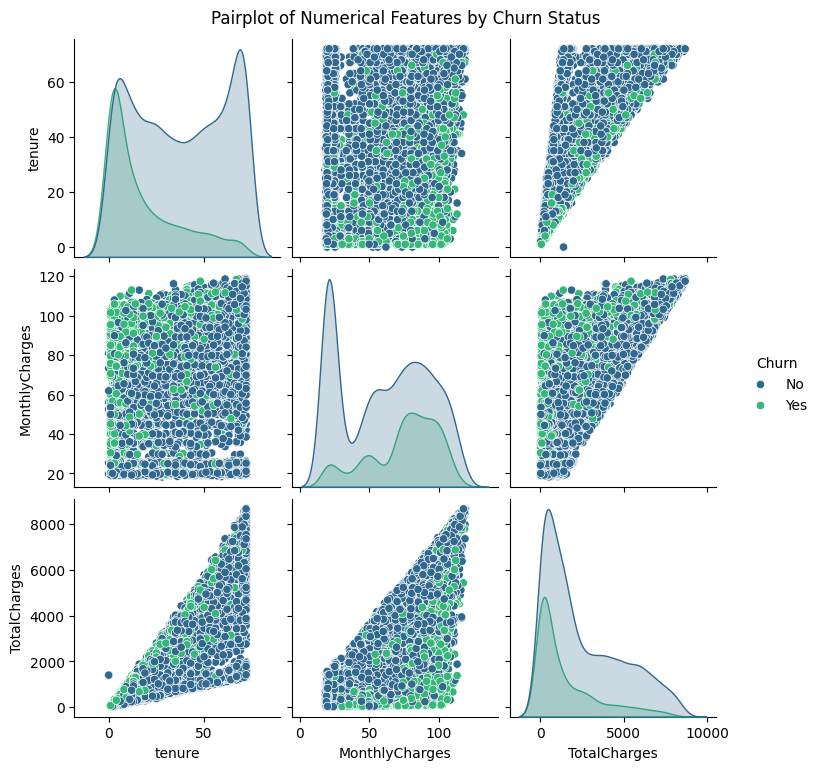

In [48]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a pairplot of the numerical features with 'Churn' as the hue
sns.pairplot(df, vars=numerical_features, hue='Churn', palette='viridis')
plt.suptitle('Pairplot of Numerical Features by Churn Status', y=1.02) # Adjust suptitle to prevent overlap
plt.show()

Pairplot Insight: The pairplot shows that churned customers cluster heavily in the low-tenure and low-TotalCharges region, often with higher MonthlyCharges, while long-tenured customers with high TotalCharges almost never churn—indicating that early-stage users paying more per month are the most vulnerable, whereas long-term customers show strong loyalty.

<Figure size 1500x700 with 0 Axes>

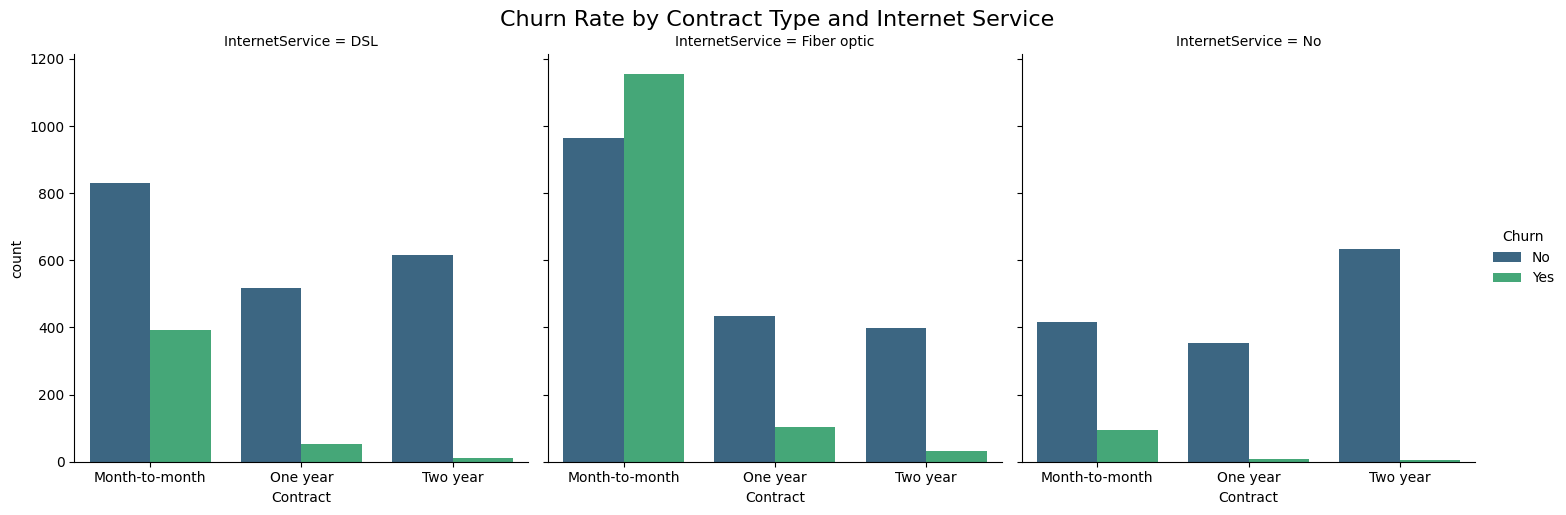

In [49]:
# Create a grouped bar chart to visualize the distribution of 'Contract' types
# across different 'InternetService' categories, with 'Churn' as the hue.
plt.figure(figsize=(15, 7))
sns.catplot(data=df, x='Contract', hue='Churn', col='InternetService', kind='count', palette='viridis', height=5, aspect=1)
plt.suptitle('Churn Rate by Contract Type and Internet Service', y=1.02, fontsize=16)
plt.show()

**InternetService × Contract Insight:** Customers with Fiber optic on Month-to-month contracts show the highest churn by far, while DSL users churn less and “No internet” customers are very stable; across all internet types, longer contracts dramatically reduce churn—making Fiber-optic Month-to-Month users the key high-risk segment and a prime target for retention strategies.

<Figure size 1500x700 with 0 Axes>

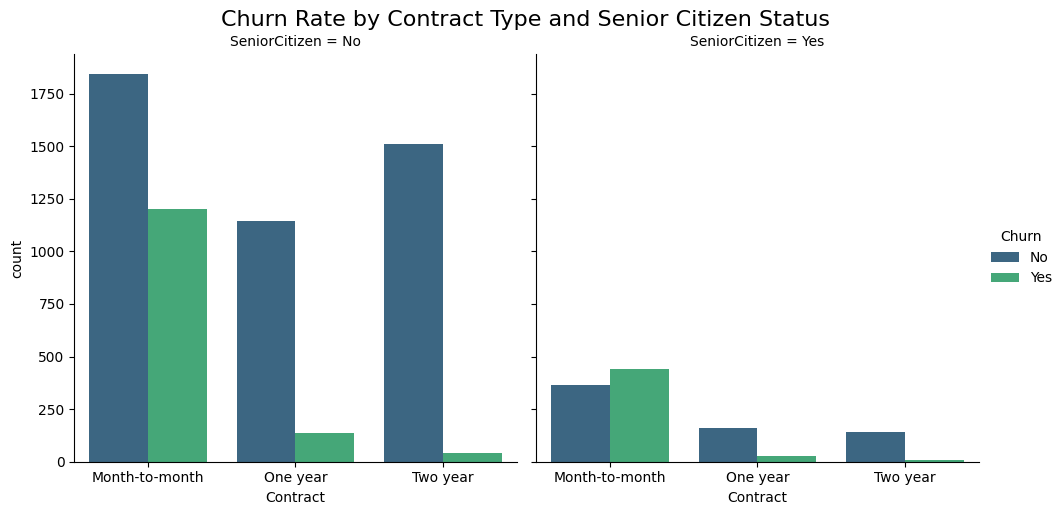

In [50]:
# Create a grouped bar chart to visualize the distribution of 'Contract' types
# across different 'SeniorCitizen' categories, with 'Churn' as the hue.
plt.figure(figsize=(15, 7))
sns.catplot(data=df, x='Contract', hue='Churn', col='SeniorCitizen', kind='count', palette='viridis', height=5, aspect=1)
plt.suptitle('Churn Rate by Contract Type and Senior Citizen Status', y=1.02, fontsize=16)
plt.show()

### Observations from Contract Type and Senior Citizen Status vs. Churn Plot:
Month-to-month contracts show the highest churn for both seniors and non-seniors, but senior citizens on month-to-month plans churn at an even higher proportion, while longer contracts (one-year and two-year) sharply reduce churn across both groups—making senior citizens on short-term plans the most at-risk segment.

## Final Insights, Recommendations, and Key Features for Modeling

### Key Insights from Data Analysis:

Through our comprehensive univariate, bivariate, and multivariate analysis, we've uncovered several critical drivers of customer churn:

1.  **Tenure is Paramount:** Short-tenure customers (especially under 10–20 months) are highly likely to churn. Tenure shows the strongest negative correlation with churn (-0.35), confirming that long-term engagement is protective.
2.  **Contract Length Reduces Churn:** Month-to-month contracts exhibit the highest churn, while one-year and two-year contracts significantly lower churn (-0.39 correlation). Long-term contracts are highly effective across all customer segments.
3.  **Internet Service Matters:** Fiber optic users show higher churn (0.23 correlation), while customers with no internet service are highly loyal. Internet service type interacts strongly with contract length and monthly charges to influence churn.
4.  **Value-Added Services Retain Customers:** Subscriptions to Online Security, Tech Support, Online Backup, and Device Protection reduce churn (-0.17 to -0.10 correlations). Customers who use these services are more likely to stay.
5.  **Payment Method as a Proxy:** Electronic check users have higher churn (0.11 correlation), suggesting lower commitment or greater price sensitivity.
6.  **Demographic Factors:**
    *   **Senior Citizens** (0.15 correlation), especially on month-to-month plans, are particularly vulnerable.
    *   Customers **without partners** and **without dependents** tend to have higher churn rates.
    *   Gender shows negligible correlation and is not a strong predictor.
7.  **Charging Patterns:**
    *   Higher Monthly Charges (0.19 correlation) increase churn likelihood, particularly for short-tenure customers.
    *   Total Charges (-0.20 correlation) is negatively correlated due to its strong link with tenure.
8.  **Multivariate Interactions:** High-risk segments include Fiber optic users on month-to-month contracts and senior citizens on month-to-month plans.

### Recommendations for Churn Prevention:

Based on these insights, here are actionable recommendations:

1.  **Prioritize New Customer Retention:** Focus on customers within the first 6–12 months. Implement loyalty programs, onboarding incentives, and proactive engagement.
2.  **Promote Longer Contracts:** Actively encourage customers (especially those currently on month-to-month plans) to switch to one-year or two-year contracts through discounts, loyalty bonuses, or bundling attractive services.
3.  **Address Fiber Optic Issues:** Investigate potential sources of dissatisfaction among Fiber optic users. This could involve service quality improvements, better customer support, or competitive pricing adjustments. Consider offering incentives for Fiber optic customers to commit to longer contracts.
4.  **Highlight Value-Added Services:** Actively market and, if possible, bundle Online Security, Online Backup, Device Protection, and Tech Support. Emphasize the benefits of these services for customer satisfaction and retention.
5.  **Re-evaluate Electronic Check Experience:** Understand why customers using electronic checks have higher churn. This might involve improving the digital payment experience, offering alternative secure payment options, or ensuring these customers receive timely communications.
6.  **Targeted Campaigns:** Develop specific retention campaigns for at-risk segments, such as senior citizens on month-to-month plans, or customers without partners/dependents who are known to churn more frequently.

### Important Features for a Predictive Model:

Given their strong relationships with 'Churn', the following features should be included in your churn prediction model:

*   **tenure** (most critical)
*   **Contract** (especially 'Month-to-month')
*   **InternetService** (especially 'Fiber optic' and 'No internet service')
*   **OnlineSecurity**
*   **OnlineBackup**
*   **DeviceProtection**
*   **TechSupport**
*   **PaymentMethod** (especially 'Electronic check')
*   **SeniorCitizen**
*   **Partner**
*   **Dependents**
*   **MonthlyCharges**



Based on our comprehensive analysis, here are the features that appear to offer less predictive power or impact on churn compared to others:

Gender: Our bivariate analysis explicitly showed that churn is nearly identical between males and females. This suggests gender has very little, if any, influence on whether a customer churns.

PhoneService: While most customers have phone service, its presence or absence alone doesn't strongly differentiate churners from non-churners. The churn rate for those with phone service is higher simply because there are far more customers with phone service. Features like MultipleLines (which is related) provided slightly more insight.

StreamingTV and StreamingMovies: The churn patterns for these services were quite similar, with only a slightly higher proportion of churn among users. Our analysis noted that their impact was 'less impactful than security or tech support'. They don't appear to be major drivers of churn on their own.

These features don't show strong or distinct patterns related to churn, unlike tenure, Contract, InternetService, and security/support services, which exhibited very clear relationships with churn.

# **Building the Predictive Model**

# Encoding the Features

In [ ]:
# Binary categorical features
binary_features = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                   'SeniorCitizen','Partner','Dependents']

# Multi-class categorical features
multi_class_features = ['Contract','InternetService','PaymentMethod']

# Numerical features
numerical_features = ['tenure','MonthlyCharges','TotalCharges']

# Target
target = 'Churn'
from sklearn.preprocessing import LabelEncoder

all_categorical = binary_features + multi_class_features

le = LabelEncoder()
for col in all_categorical:
    df[col] = le.fit_transform(df[col])

# Encode target
df[target] = le.fit_transform(df[target])  # 'No' -> 0, 'Yes' -> 1



In [ ]:
X = df[binary_features + multi_class_features + numerical_features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

#SmoteNC for treating the class imbalance

In [ ]:
from imblearn.over_sampling import SMOTENC

categorical_indices = [X_train.columns.get_loc(col) for col in binary_features + multi_class_features]
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)


In [ ]:
pipeline = Pipeline([
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

pipeline.fit(X_train_res, y_train_res)


In [ ]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [ ]:
y_pred

In [ ]:
y_proba

In [ ]:
# Predict labels on the test set
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class (Churn=1)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC score
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

In [ ]:
# y_train_res is the resampled target from SMOTENC
class_counts = pd.Series(y_train_res).value_counts()
print("Class distribution after SMOTENC:")
print(class_counts)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# --- Define Random Forest and Pipeline ---
rf_improved = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

improved_pipeline = Pipeline([
    ('model', rf_improved)
])

# --- Grid Search Parameters ---
param_grid = {
    'model__n_estimators': [200, 500],
    'model__max_depth': [None, 20, 30],
    'model__min_samples_split': [2, 5],
}

# --- GridSearchCV ---
grid_search = GridSearchCV(
    estimator=improved_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# --- Fit GridSearchCV on resampled training data ---
grid_search.fit(X_train_res, y_train_res)

# --- Get the best pipeline ---
best_pipeline = grid_search.best_estimator_

# --- Predictions on test set ---
y_pred_rf = best_pipeline.predict(X_test)
y_proba_rf = best_pipeline.predict_proba(X_test)[:, 1]

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# --- Classification Report ---
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=["No Churn", "Churn"]))

# --- Accuracy and ROC-AUC ---
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)
print("Accuracy - Random Forest:", accuracy)
print("ROC-AUC Score - Random Forest:", roc_auc)


In [ ]:
rf_improved = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

improved_pipeline = Pipeline([
    ('model', rf_improved)
])

param_dist = {
    'model__n_estimators': randint(200, 700),
    'model__max_depth': randint(10, 40),
    'model__min_samples_split': randint(2, 12),
    'model__min_samples_leaf': randint(1, 4),
    'model__max_features': ['sqrt', 'log2'],
    'model__bootstrap': [True],
    'model__class_weight': ['balanced', 'balanced_subsample']
}


random_search = RandomizedSearchCV(
    estimator=improved_pipeline,
    param_distributions=param_dist,
    n_iter=40,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# -------------------------------
# Fit on resampled training data
# -------------------------------
random_search.fit(X_train_res, y_train_res)

# -------------------------------
# Best pipeline and summary
# -------------------------------
best_pipeline = random_search.best_estimator_

print("Best Random Forest parameters found:")
print(random_search.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Random Forest parameters found:
{'model__bootstrap': True, 'model__class_weight': 'balanced_subsample', 'model__max_depth': 14, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'model__n_estimators': 648}


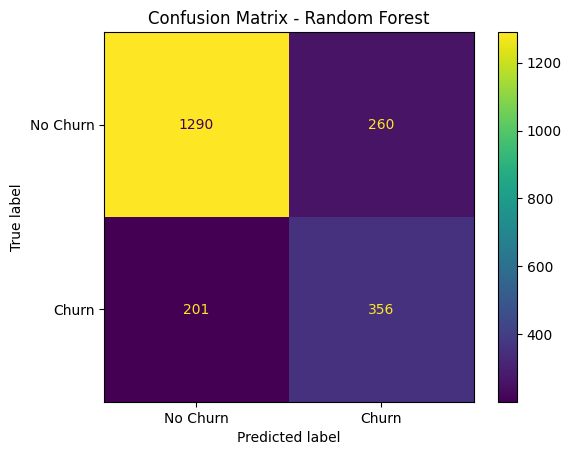

Classification Report - Random Forest:
              precision    recall  f1-score   support

    No Churn       0.87      0.83      0.85      1550
       Churn       0.58      0.64      0.61       557

    accuracy                           0.78      2107
   macro avg       0.72      0.74      0.73      2107
weighted avg       0.79      0.78      0.78      2107

Accuracy - Random Forest: 0.7812055054579972
ROC-AUC Score - Random Forest: 0.8302542421960966


In [ ]:
# --- Predictions on test set ---
y_pred_rf = best_pipeline.predict(X_test)
y_proba_rf = best_pipeline.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=["No Churn", "Churn"]))

accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)
print("Accuracy - Random Forest:", accuracy)
print("ROC-AUC Score - Random Forest:", roc_auc)


In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt_pipeline = Pipeline([
    ('model', dt)
])

dt_params = {
    'model__max_depth': [3, 5, 7, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    dt_pipeline,
    param_grid=dt_params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

dt_grid.fit(X_train_res, y_train_res)

# Evaluate best estimator
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

print("=== Decision Tree Best Params ===")
print(dt_grid.best_params_)


Fitting 3 folds for each of 90 candidates, totalling 270 fits
=== Decision Tree Best Params ===
{'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


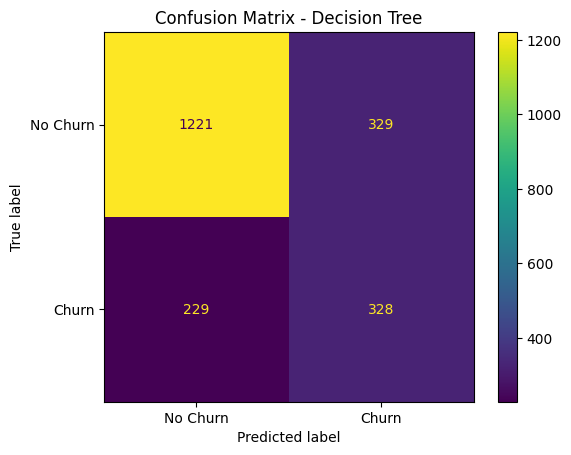

Classification Report - Decision Tree:
              precision    recall  f1-score   support

    No Churn       0.84      0.79      0.81      1550
       Churn       0.50      0.59      0.54       557

    accuracy                           0.74      2107
   macro avg       0.67      0.69      0.68      2107
weighted avg       0.75      0.74      0.74      2107

Accuracy - Decision Tree: 0.7351684859990508
ROC-AUC Score - Decision Tree: 0.735274222505357


In [ ]:
# Predict on the test set
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]  # Probability for positive class (Churn=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Classification Report
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=["No Churn", "Churn"]))

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy - Decision Tree:", accuracy_dt)

# ROC-AUC Score
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print("ROC-AUC Score - Decision Tree:", roc_auc_dt)


In [ ]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_pipeline = Pipeline([
    ('model', xgb)
])

xgb_params = {
    'model__n_estimators': [200, 500],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 4, 6],
    'model__subsample': [0.8, 0.9],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 0.1]
}

xgb_grid = GridSearchCV(
    xgb_pipeline,
    param_grid=xgb_params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit on resampled training data
xgb_grid.fit(X_train_res, y_train_res)

# Evaluate on test set
best_xgb = xgb_grid.best_estimator_


Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:33:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


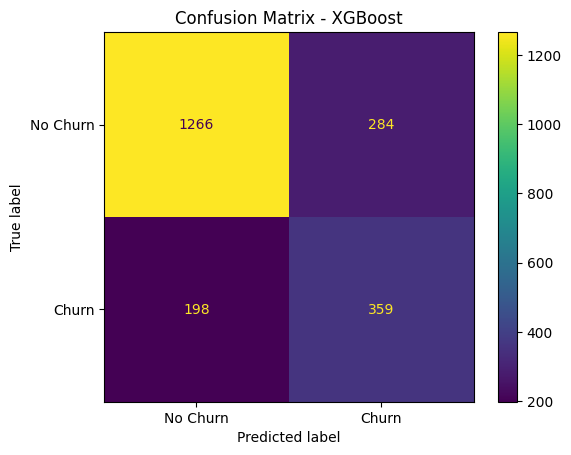

Classification Report - XGBoost:
              precision    recall  f1-score   support

    No Churn       0.86      0.82      0.84      1550
       Churn       0.56      0.64      0.60       557

    accuracy                           0.77      2107
   macro avg       0.71      0.73      0.72      2107
weighted avg       0.78      0.77      0.78      2107

Accuracy - XGBoost: 0.7712387280493592
ROC-AUC Score - XGBoost: 0.8290397868767012


In [ ]:
# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]  # Probability for positive class (Churn=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification Report
print("Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=["No Churn", "Churn"]))

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy - XGBoost:", accuracy_xgb)

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("ROC-AUC Score - XGBoost:", roc_auc_xgb)


In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_pipeline.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, best_pipeline.predict_proba(X_test)[:, 1])

fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
auc_dt = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

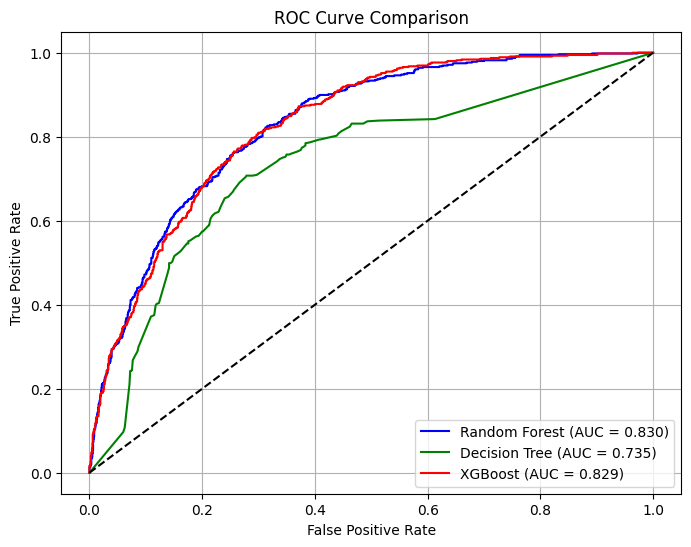

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', color='red')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
import joblib

joblib.dump(best_pipeline, 'random_forest_churn_model.pkl')

print("Model saved as 'random_forest_churn_model.pkl'")

Model saved as 'random_forest_churn_model.pkl'


In [ ]:
from google.colab import files

files.download('random_forest_churn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the saved model
loaded_model = joblib.load('random_forest_churn_model.pkl')

# Make predictions
y_pred_loaded = loaded_model.predict(X_test)
y_proba_loaded = loaded_model.predict_proba(X_test)[:, 1]

print("Predicted classes from loaded model:", y_pred_loaded[:10])
print("Predicted probabilities from loaded model:", y_proba_loaded[:10])

Predicted classes from loaded model: [0 0 0 0 0 1 0 0 1 1]
Predicted probabilities from loaded model: [0.05933133 0.00156908 0.17732148 0.11702234 0.41633738 0.8849106
 0.02961961 0.15065509 0.55733813 0.6473033 ]


In [ ]:
import joblib

loaded_model = joblib.load('random_forest_churn_model.pkl')


binary_features = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                   'SeniorCitizen','Partner','Dependents']

multi_class_features = ['Contract','InternetService','PaymentMethod']

numerical_features = ['tenure','MonthlyCharges','TotalCharges']

all_categorical = binary_features + multi_class_features

model_features_ordered = all_categorical + numerical_features

# -------------------------------
# Initialize LabelEncoders for categorical features
# -------------------------------
label_encoders = {}

unique_categories = {
    'OnlineSecurity': ['No', 'Yes', 'No internet service'],
    'OnlineBackup': ['No', 'Yes', 'No internet service'],
    'DeviceProtection': ['No', 'Yes', 'No internet service'],
    'TechSupport': ['No', 'Yes', 'No internet service'],
    'SeniorCitizen': ['No', 'Yes'],
    'Partner': ['No', 'Yes'],
    'Dependents': ['No', 'Yes'],
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'InternetService': ['DSL', 'Fiber optic', 'No'],
    'PaymentMethod': ['Bank transfer (automatic)', 'Credit card (automatic)',
                      'Electronic check', 'Mailed check']
}

for col, categories in unique_categories.items():
    le = LabelEncoder()
    le.fit(categories)
    label_encoders[col] = le

# -------------------------------
# Churn prediction function
# -------------------------------
def predict_churn(new_data: pd.DataFrame, model=loaded_model,
                  features_order=model_features_ordered, encoders=label_encoders):
    """
    Predict churn for new customer data.
    """
    new_data_processed = new_data.copy()


    if 'SeniorCitizen' in new_data_processed.columns and new_data_processed['SeniorCitizen'].dtype in ['int64', 'int32']:
        new_data_processed['SeniorCitizen'] = new_data_processed['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

    # Apply Label Encoding to categorical features
    for col in encoders:
        if col in new_data_processed.columns:
            try:
                new_data_processed[col] = encoders[col].transform(new_data_processed[col])
            except ValueError as e:
                print(f"Error encoding column {col}: {e}. Ensure new data categories are seen by the encoder.")
                return None


    new_data_processed = new_data_processed[features_order]

    # Predict class and probability
    y_pred = model.predict(new_data_processed)
    y_proba = model.predict_proba(new_data_processed)[:, 1]

    return {
        'Predicted_Class': y_pred[0],
        'Churn_Probability': y_proba[0]
    }

# -------------------------------
# Example new customer
# -------------------------------
new_customer = pd.DataFrame({
    'tenure': [50],
    'MonthlyCharges': [75.0],
    'TotalCharges': [1403.875],  # Added numeric feature
    'Contract': ['Two year'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'PaymentMethod': ['Electronic check'],
    'SeniorCitizen': [1], # 1 = Yes
    'Partner': ['No'],
    'Dependents': ['No']
})

# -------------------------------
# Make prediction
# -------------------------------
result = predict_churn(new_customer)

if result:
    print("Predicted class for new customer:", result['Predicted_Class'])
    print("Probability of churn:", result['Churn_Probability'])



Predicted class for new customer: 0
Probability of churn: 0.24485374367704837


In [ ]:
models = {
    "Random Forest": best_pipeline,
    "Decision Tree": best_dt,
    "XGBoost": best_xgb
}

# To store results
results = []

# Loop through each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, round(acc, 2), round(prec, 2), round(rec, 2), round(f1, 2)])


results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True))

           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest      0.78       0.58    0.64      0.61
1        XGBoost      0.77       0.56    0.64      0.60
2  Decision Tree      0.74       0.50    0.59      0.54


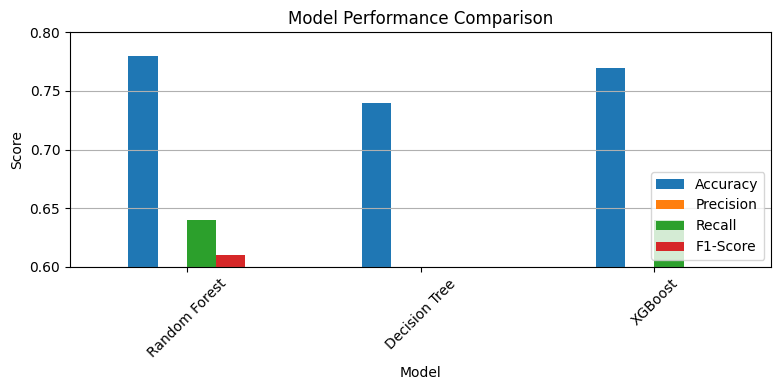

In [ ]:
# Plot F1 Scores
results_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], kind='bar', figsize=(8,4))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.6, 0.8)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()